In [28]:
import numpy as np
from matplotlib import pyplot as plt
import csv
import pandas as pd

In [29]:
def load_dataset_csv(data_path):
    with open(data_path, newline='') as f:
        csv_reader = csv.reader(f)    

        next(csv_reader)

        X = []
        y = []

        for row in csv_reader:
            X.append(row[0])
            y.append(row[1])
        
    X = np.array(X, dtype=float)
    y = np.array(y, dtype=float)

    return X, y

In [30]:
def polynomial_regression(X, y, n):
    # polynomial features x^n to x^0
    X_poly = np.vander(X, N=n+1)

    w = np.linalg.lstsq(X_poly.T @ X_poly, X_poly.T @ y, rcond=None)[0]

    return w

In [31]:
def mse_loss(y, y_hat):
    return np.linalg.norm(y_hat - y) ** 2

In [32]:
def kfold_crossval(X, y, n, k=10):
    nof_samples = X.shape[0]

    indx_split = np.array_split(range(nof_samples), k)

    val_losses = []

    for indx_val in indx_split:   
        # remove fold from training data
        train_X = np.delete(X, indx_val, axis=0)
        train_y = np.delete(y, indx_val)
    
        # set fold to validation data
        valid_X = X[indx_val]
        valid_y = y[indx_val]
        
        w = polynomial_regression(X=train_X, y=train_y, n=n)

        valid_X_poly = np.vander(valid_X, N=n+1)
        valid_y_hat = valid_X_poly @ w

        val_loss = mse_loss(valid_y, valid_y_hat)
        val_losses.append(val_loss)

    mean_val_loss = np.mean(val_losses)
    
    return mean_val_loss

In [33]:
def find_best_poly_model(X, y, n=9):

    kfold_deg_losses = {}

    for i in range(1, n+1):
        kfold_deg_losses[i] = kfold_crossval(X, y, i)

    best_deg = min(kfold_deg_losses, key=lambda k: kfold_deg_losses[k])

    return best_deg, kfold_deg_losses[best_deg]

In [34]:
def plot(X, y, w):
    """
    This functions plots 2D data assuming a linear model with
    polynomial basis functions. The weights have to be provided
    in ascending order in the degree of polynomials.
    """

    plt.plot(X, y, ".r", markersize=8, label="Samples")

    x_plot = np.linspace(np.min(X), np.max(X), 100)
    X_plot = np.vander(x_plot, N=len(w))

    # set plotting range properly
    plt.ylim((np.min(y) * 1.2, np.max(y) * 1.2))

    plt.plot(
        x_plot,
        X_plot @ w,
        linewidth=5,
        color="tab:blue",
        label="Model",
    )

    plt.tight_layout()
    plt.show()

### dataset0

In [35]:
X, y = load_dataset_csv(data_path="dataset0.csv")
best_deg = find_best_poly_model(X, y)

print("Best fitting polynomial degree:", best_deg)

Best fitting polynomial degree: (7, 0.21993085361609604)


/tmp/ipykernel_7650/4066919228.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w = np.linalg.lstsq(X_poly.T @ X_poly, X_poly.T @ y)[0]


In [9]:
w = polynomial_regression(X=X, y=y, n=best_deg[0])
print(w)
plot(X, y, w)

NameError: name 'best_deg' is not defined

### dataset1

In [10]:
X, y = load_dataset_csv(data_path="dataset1.csv")
best_deg = find_best_poly_model(X, y)

print("Best fitting polynomial degree:", best_deg)

TypeError: solve() got an unexpected keyword argument 'rcond'

In [11]:
w = polynomial_regression(X=X, y=y, n=best_deg[0])
print(w)
plot(X, y, w)

NameError: name 'best_deg' is not defined

### dataset2

In [ ]:
X, y = load_dataset_csv(data_path="dataset2.csv")
best_deg = find_best_poly_model(X, y)

print("Best fitting polynomial degree:", best_deg)

Best fitting polynomial degree: (5, 17.747536022186264)


[ 1.06890720e-03  1.53425286e-03 -2.41512975e-02  9.40656740e-02
  8.73230131e-01  1.54292466e+00]


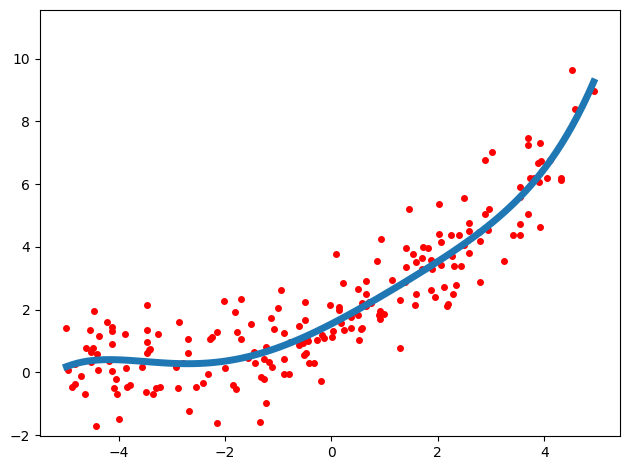

In [ ]:
w = polynomial_regression(X=X, y=y, n=best_deg[0])
print(w)
plot(X, y, w)